# 타이타닉 튜토리얼
---

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.use('seaborn-v0_8')     #옛버전 ->현재 버전
sns.set(font_scale=2.5)
import missingno as msno

In [5]:
import warnings
warnings.filterwarnings('ignore')   #경고 메시지 무시 / 콘솔에 메시지 출력 ㄴㄴ 

%matplotlib inline

In [6]:
df_train = pd.read_csv('./tdata/train.csv', sep=',')  #데이터 파일 읽어오기
df_test = pd.read_csv('./tdata/test.csv', sep=',')

In [7]:
df_train.head()       #5개 행 추출 가지고 있는 feature는 Pclass, Age, SibSp, Parch, Fare임을 알 수 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 예측 target label은 survived


In [8]:
df_train.describe()  #feature이 가진 통계치 반환 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()  #PassenserID를보니 다른 data가 존재하는 거 같음

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- Null data 체크

In [10]:
for col in df_train.columns:
    percent_null = 100 * (df_train[col].isnull().sum() / df_train[col].shape[0])
    msg = 'column : {:>10} \t Percent of NaN value: {: .2f}%'. format(col, percent_null)
#format() 두 번째 인자로 str이 와야해서 변수 설정
#col = df컬럼 이름 하나하나 순회하면서 받는 변수
    print(msg)    #들여쓰기 주의

column : PassengerId 	 Percent of NaN value:  0.00%
column :   Survived 	 Percent of NaN value:  0.00%
column :     Pclass 	 Percent of NaN value:  0.00%
column :       Name 	 Percent of NaN value:  0.00%
column :        Sex 	 Percent of NaN value:  0.00%
column :        Age 	 Percent of NaN value:  19.87%
column :      SibSp 	 Percent of NaN value:  0.00%
column :      Parch 	 Percent of NaN value:  0.00%
column :     Ticket 	 Percent of NaN value:  0.00%
column :       Fare 	 Percent of NaN value:  0.00%
column :      Cabin 	 Percent of NaN value:  77.10%
column :   Embarked 	 Percent of NaN value:  0.22%


In [11]:
for col in df_test.columns:
    percent_null = 100 * (df_test[col].isnull().sum() / df_test[col].shape[0])
    msg = 'column : {:>10} \t Percent of NaN value: {: .2f}%'. format(col, percent_null)
    print(msg)

#Null값 존재 확인

column : PassengerId 	 Percent of NaN value:  0.00%
column :     Pclass 	 Percent of NaN value:  0.00%
column :       Name 	 Percent of NaN value:  0.00%
column :        Sex 	 Percent of NaN value:  0.00%
column :        Age 	 Percent of NaN value:  20.57%
column :      SibSp 	 Percent of NaN value:  0.00%
column :      Parch 	 Percent of NaN value:  0.00%
column :     Ticket 	 Percent of NaN value:  0.00%
column :       Fare 	 Percent of NaN value:  0.24%
column :      Cabin 	 Percent of NaN value:  78.23%
column :   Embarked 	 Percent of NaN value:  0.00%


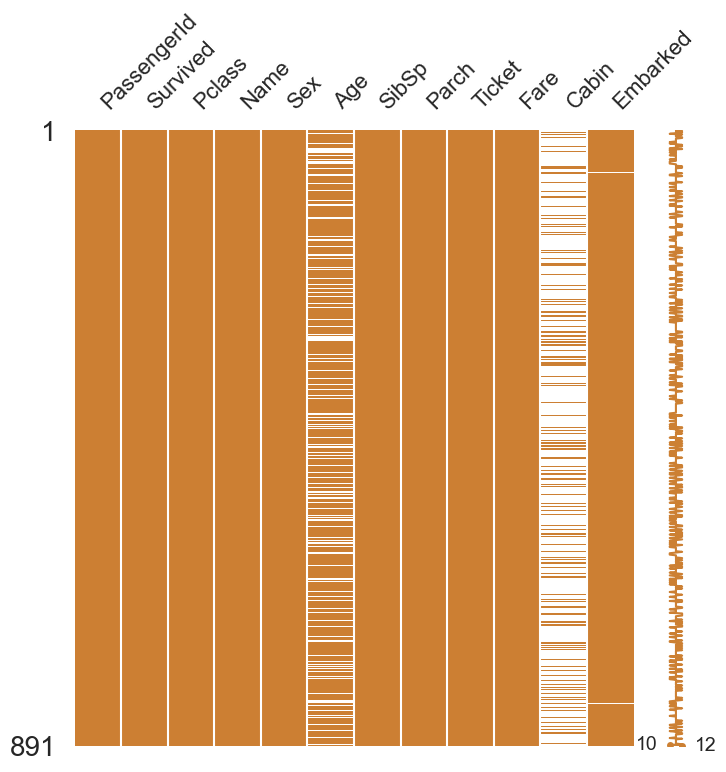

In [12]:
msno.matrix(df=df_train, figsize =(8,8), color=(0.8,0.5,0.2))  #그래프의 전체 크기(인치) ,색깔튜플(RGB)
plt.show()     #그래프 화면에 보여주기

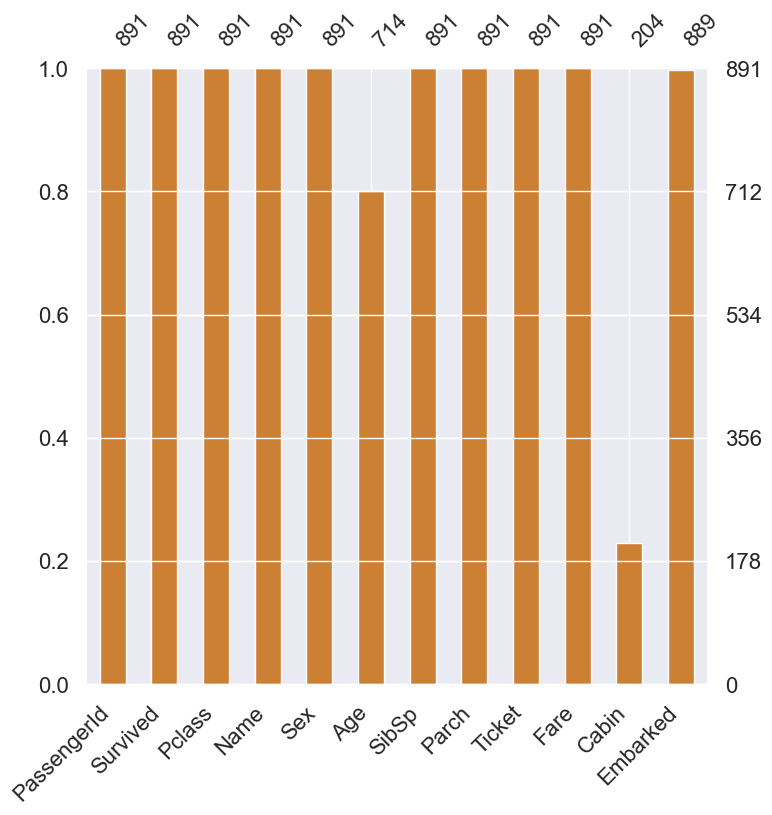

In [13]:
msno.bar(df=df_train, figsize=(8,8) , color=(0.8,0.5,0.2))
plt.show()

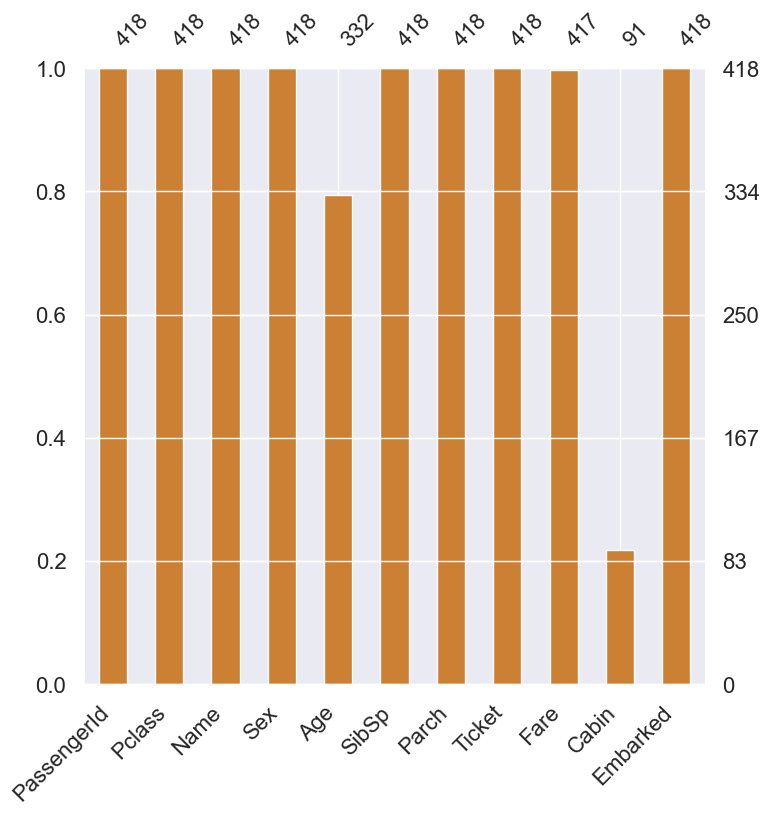

In [14]:
msno.bar(df=df_test,figsize=(8,8) , color=(0.8,0.5,0.2))
plt.show()

- Target label 확인

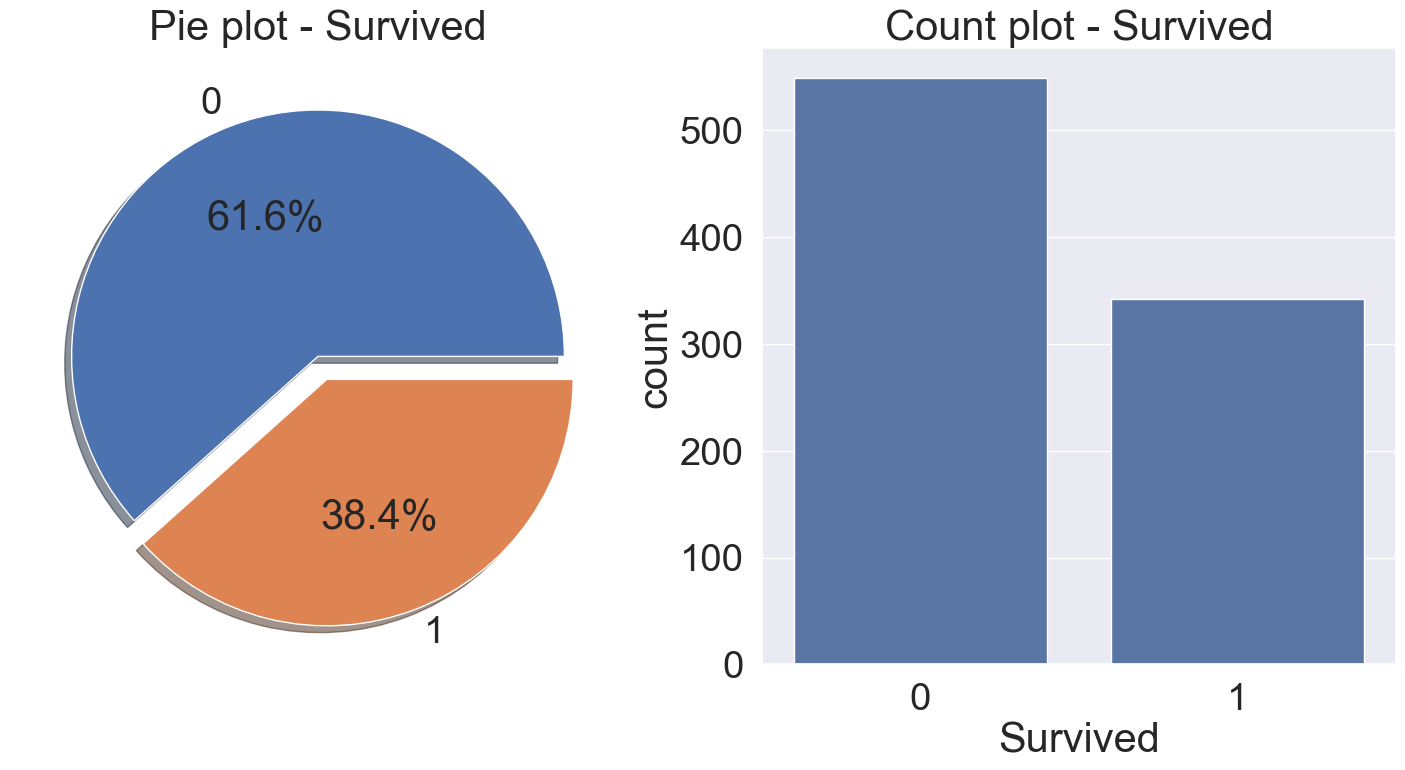

In [15]:
f, ax = plt.subplots(1,2, figsize=(18,8))
#컬럼의 값 분포를 원형 차트로 그리는 코드 / pie chart 옵션 / 1번 조각 살짝 띄움 / 1.1 소수점 첫째자리까지 / 위치 축 설정/ 그림자효과
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax=ax[0] , shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1])   #x 값 명시
ax[1].set_title('Count plot - Survived')

plt.show()


- Exploratory data analysis

In [16]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()
#Pclass로 묶은 뒤 count()로 class에 몇명이 있는지 확인

,Survived
Pclass,
1,216
2,184
3,491


In [17]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).sum()
#sum() 사용하여 216명 중 생존한(survived = 1) 사람의 총합

,Survived
Pclass,
1,136
2,87
3,119


In [18]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins =True).style.background_gradient(cmap='summer_r')
#pd를 사용하여 교차표 만든 후 스타일링 적용, Pclass=행 Survived=열,margins는 행과 열의 합계를 추가 , 값이 클수록 녹색에 가까운 밝은 색으로 표시

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

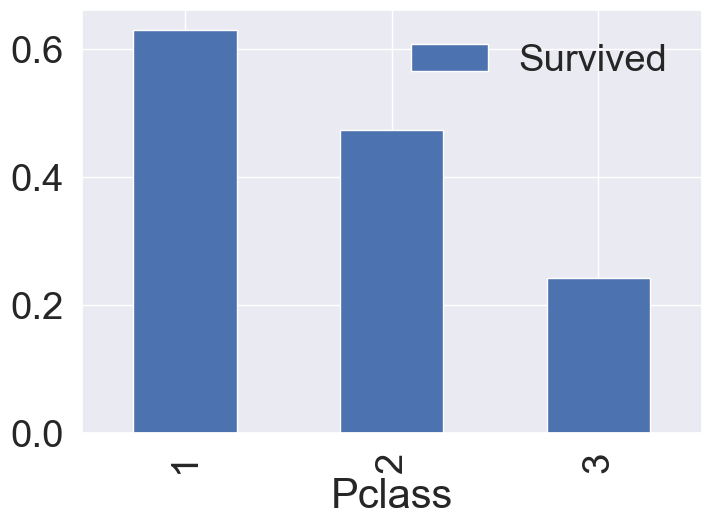

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
#클래스가 높을 수록 생존률이 높은 것을 쉽게 확인. 

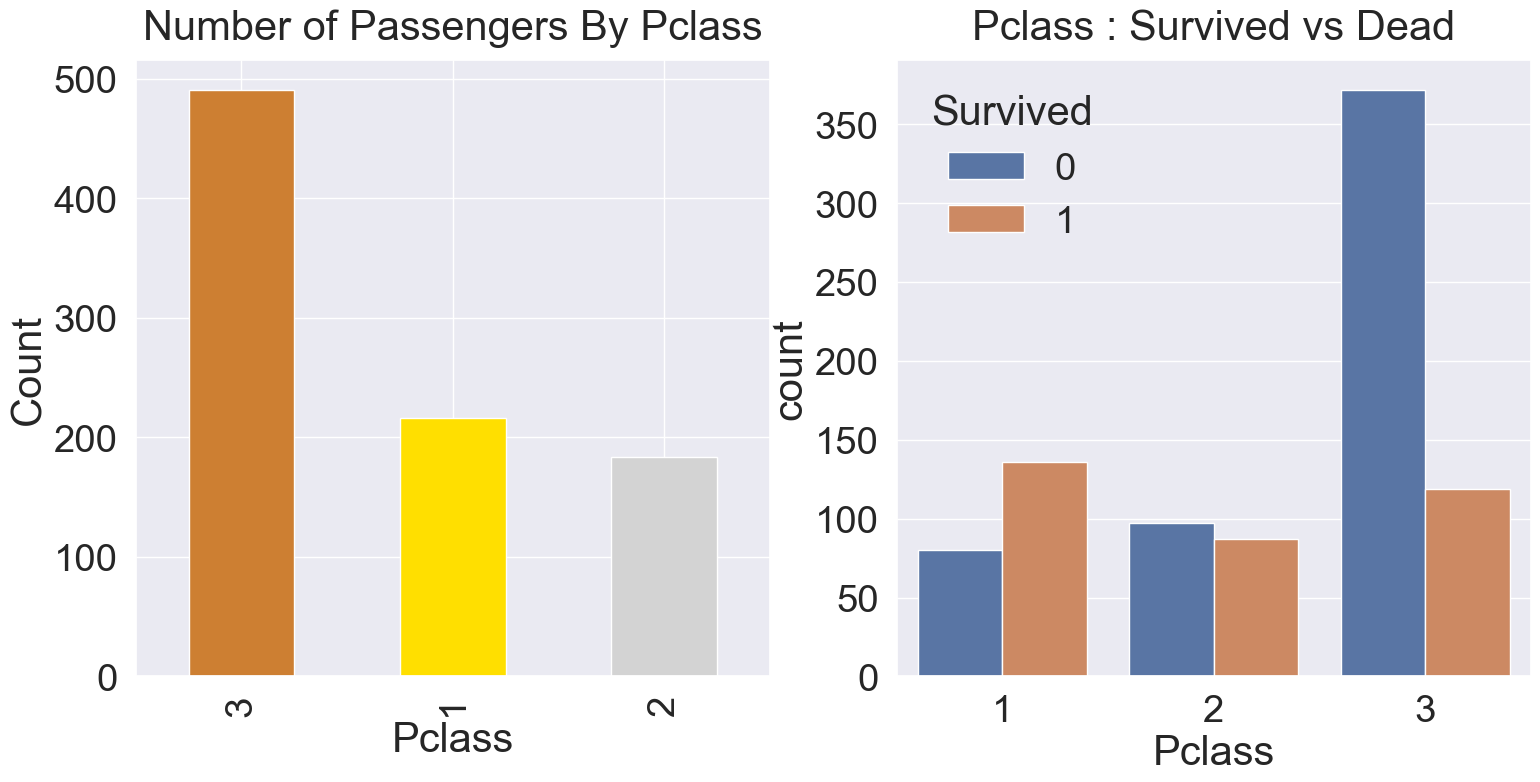

In [20]:
y_position = 1.02
#ax : 2개의 subplot을 담은 배열  하나의 창에 여러 개의 그래프를 나눠 그리고 싶을 때 사용함
f, ax = plt.subplots(1,2,figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0]. set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue = 'Survived', data= df_train, ax= ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y=y_position)
plt.show()

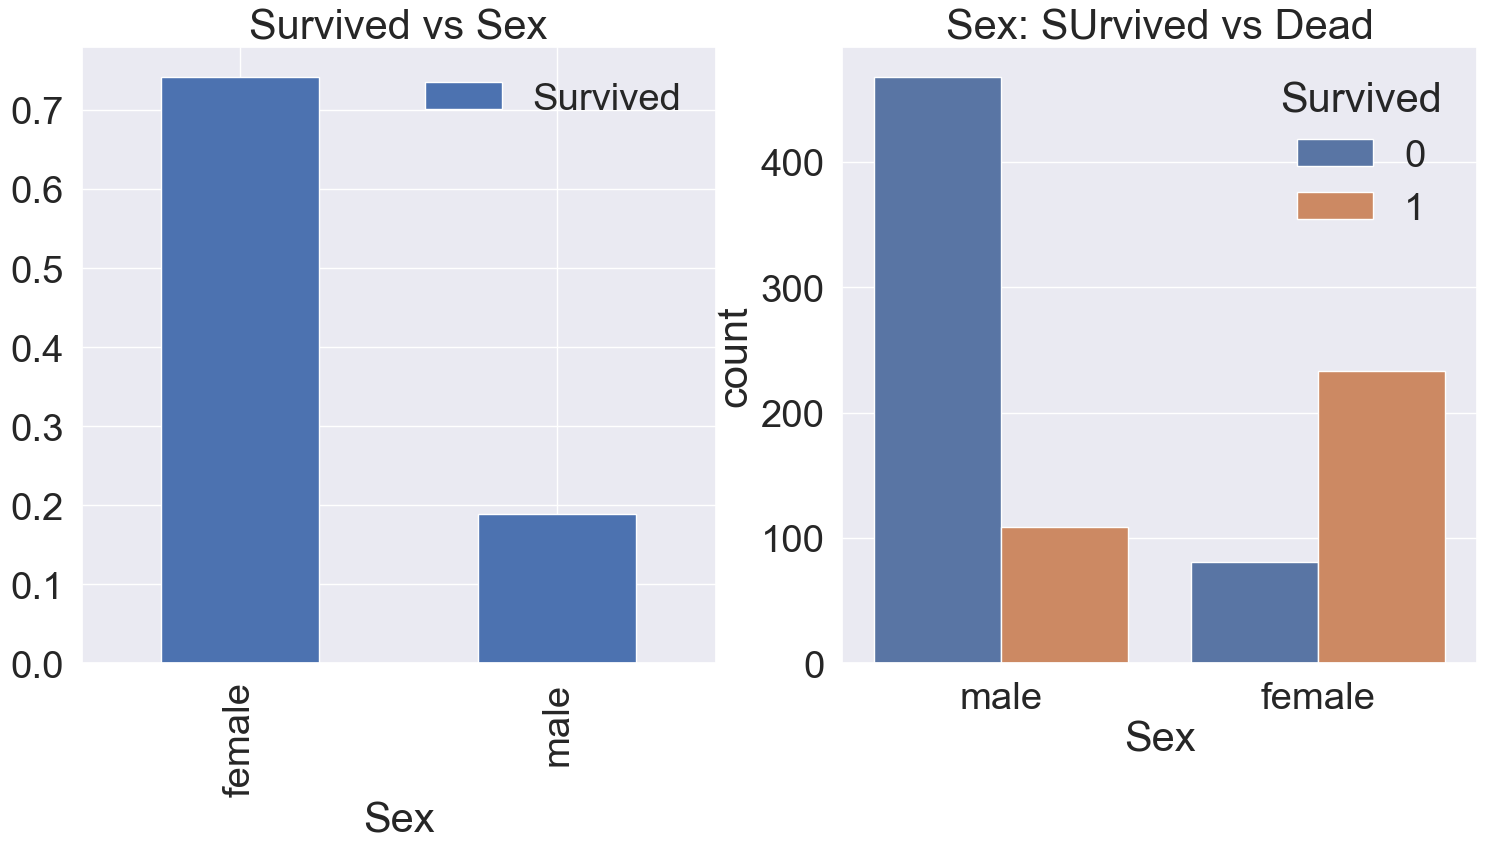

In [21]:
f, ax = plt.subplots(1,2,figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex: SUrvived vs Dead')
plt.show()
#여자의 생존 확률이 높은 것을 확인

In [22]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False) #내림차순

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- kind='point' 그래프

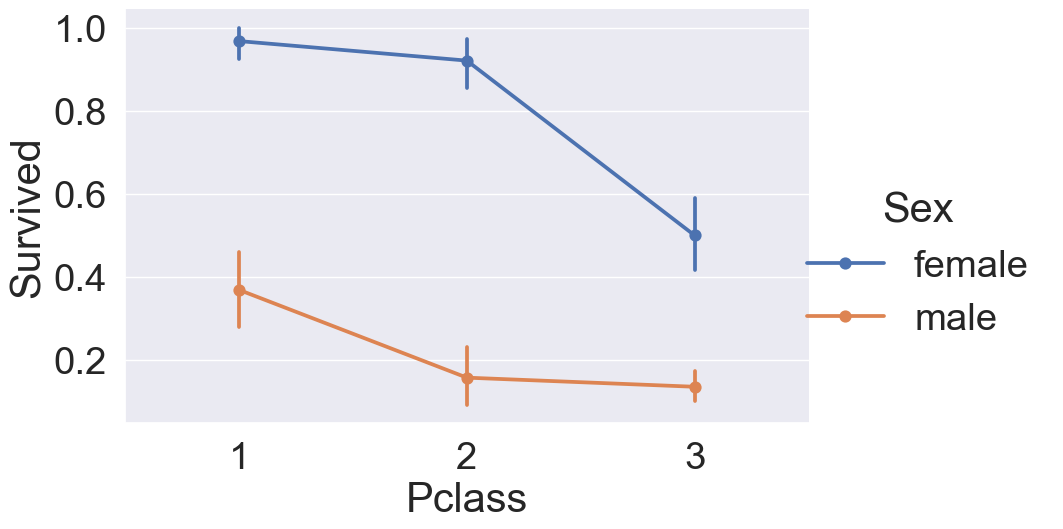

In [24]:
sns.catplot(x='Pclass',y='Survived', hue= 'Sex', data=df_train, kind='point', height=6, aspect=1.5)
#최신버전으로 업그레이드 되면서 catplot사용, x와 y 직접적으로 표시, size가 아닌 kind와 height 사용
#hue는 성별로 색 구분

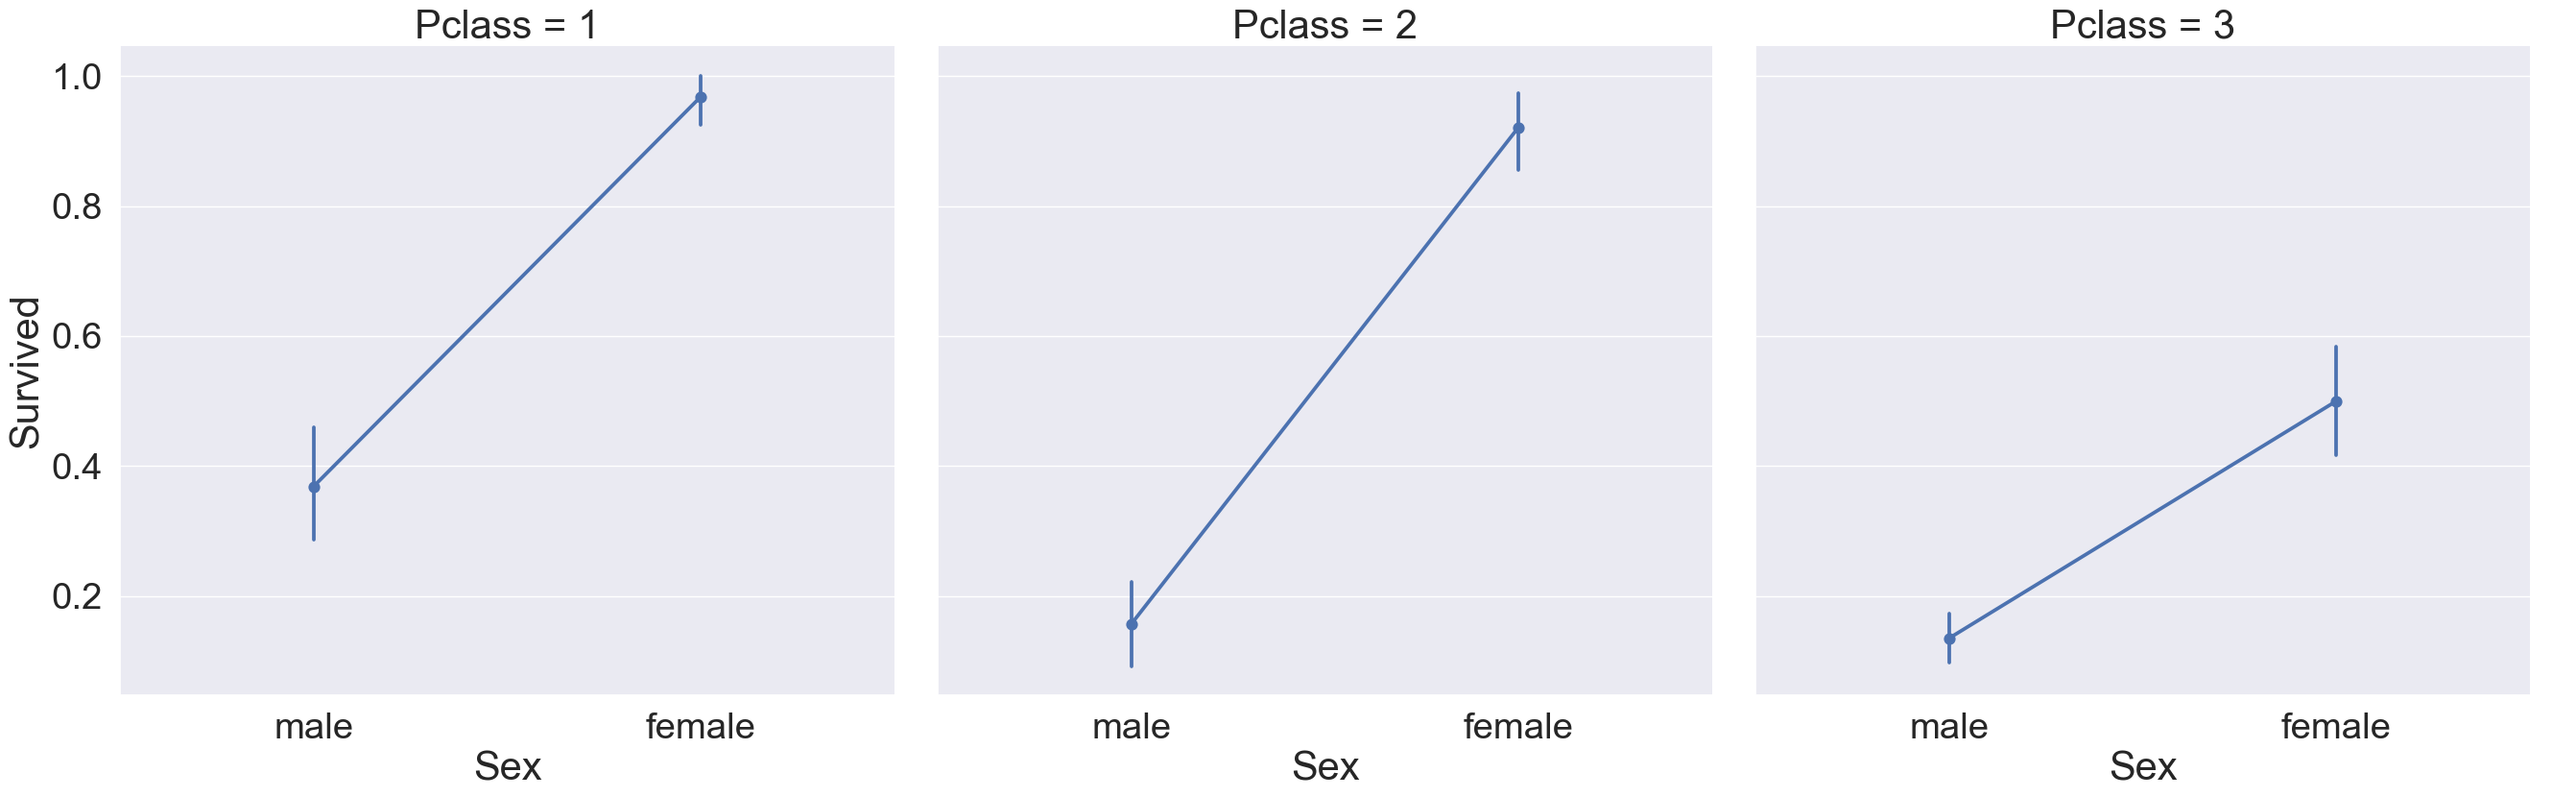

In [25]:
sns.catplot(x='Sex', y='Survived', col= 'Pclass', data=df_train, kind='point', height=9, aspect=1)
#남여 성별 / 생존률 / Pclass별로 3개의 subplot생성 / 점 - 신뢰구간 그래프

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))
#소수점 아래 1자리 & float형태로 / format()안에 넣은 값을 문자열 내의 {}자리에 삽입

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- histogram


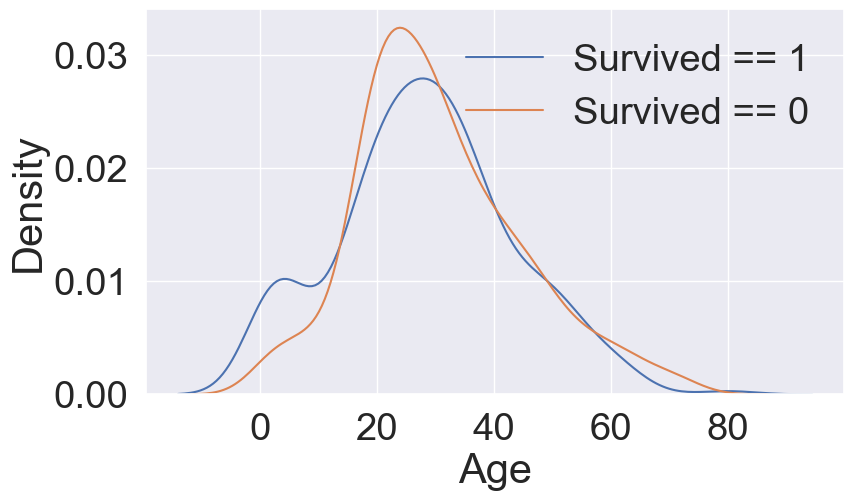

In [27]:
fig , ax = plt.subplots(1, 1, figsize=(9,5))  #1,1 하나의 서브플롯만 만듦
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)   #커널 밀도 추정 그래프
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

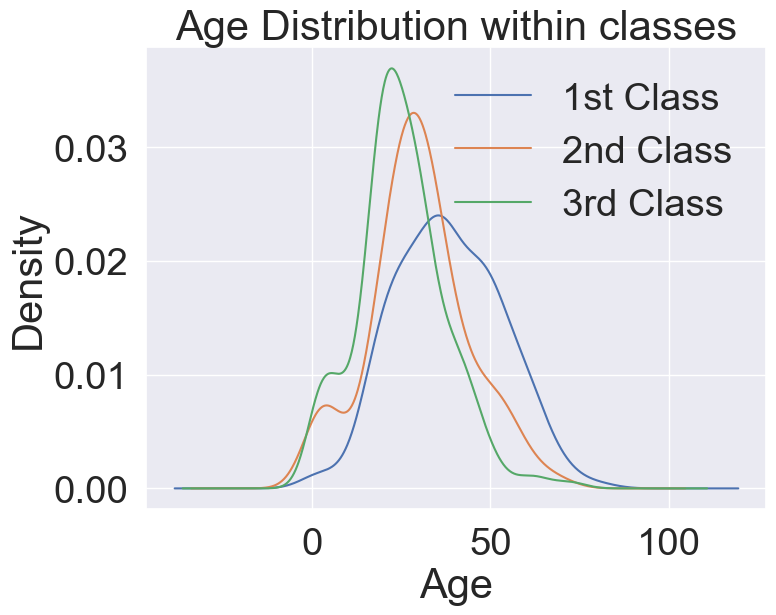

In [28]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')  #1등석 승객들의 나이 분포를 kde그래프로 그리기
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')


plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class','2nd Class','3rd Class'])  #범례 추가

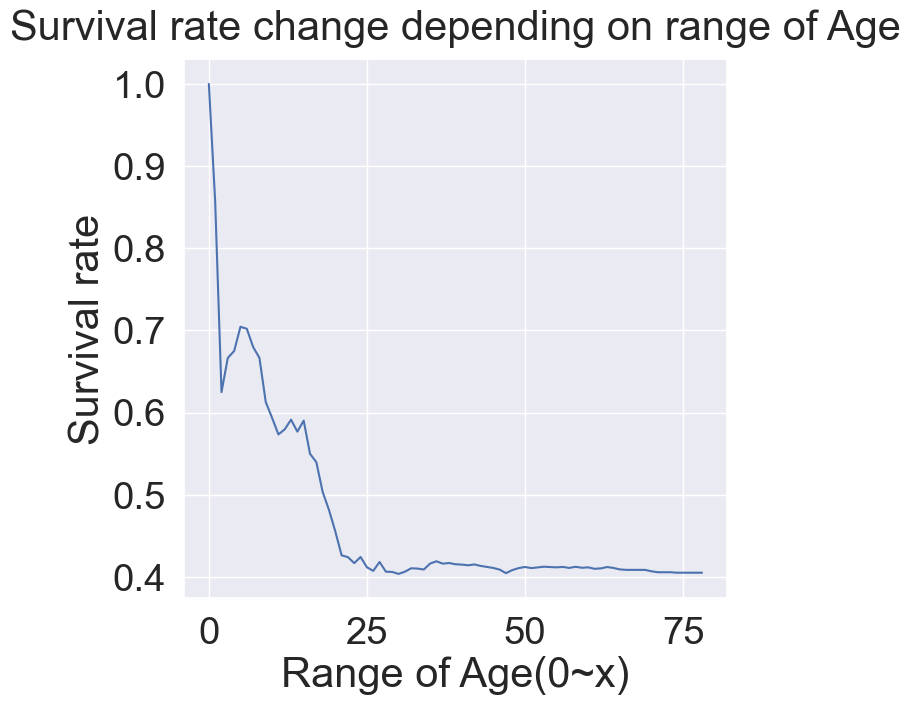

In [29]:
cummulate_survival_ratio = []
for i in range(1,80):   #나이
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / 
                                    len(df_train[df_train['Age'] < i]['Survived']))
#Age가 i보다 작은 승객들만 필터링 - 그 중에서 Survived열만 - sum()생존자 수 - 첫 조건을 만족하는 len() 총 인원 수
#생존자 수 / 전체 인원 수 = 누적 생존률
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

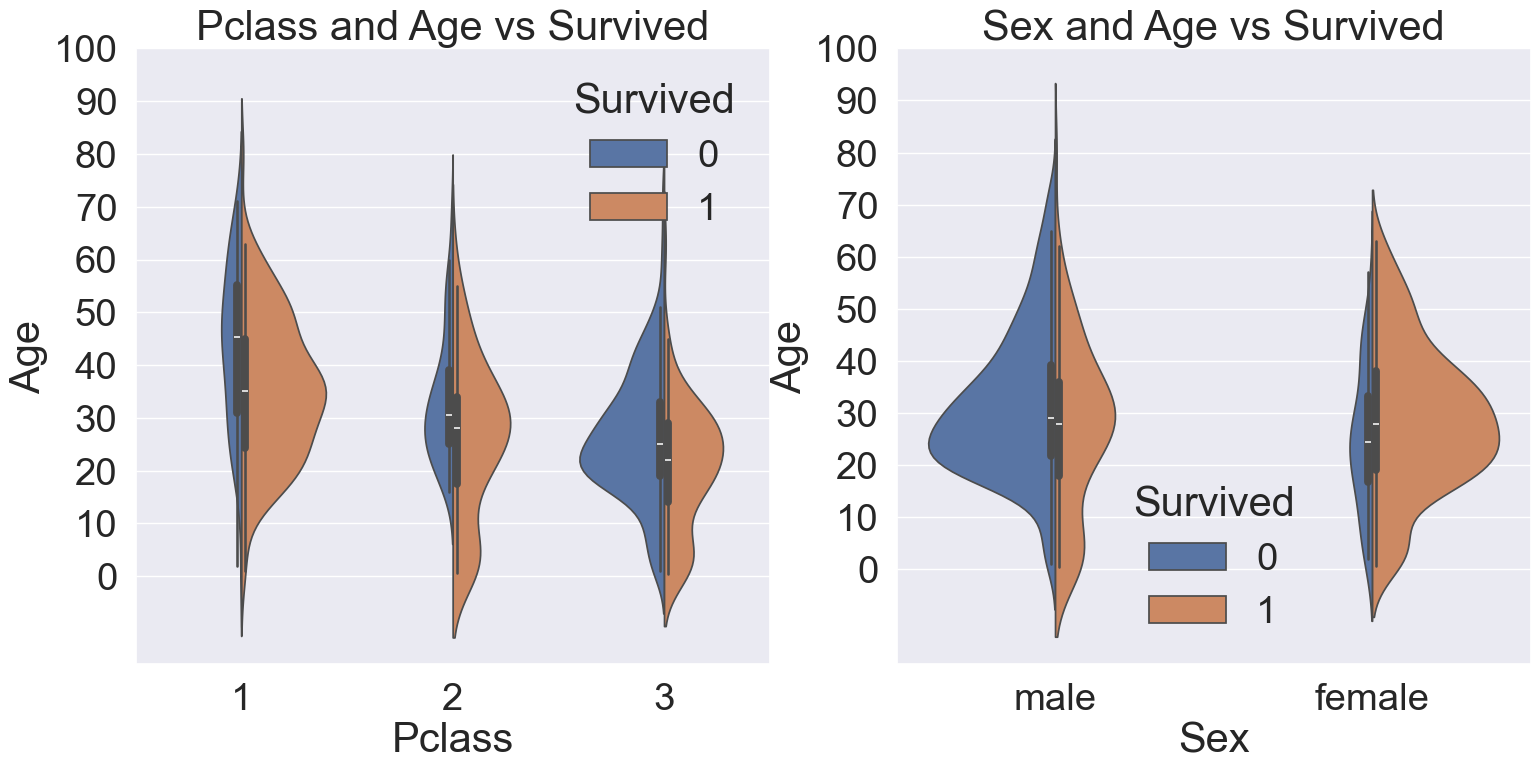

In [30]:
f , ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot(x='Pclass',y='Age', hue = 'Survived', data=df_train, scale = 'count', split= True, ax=ax[0])
#바이올린 플롯=데이터 분포 + 밀도 시각화    /  바이올린 너비를 해당 그룹 count에 따라 조절 - 표본 많은 쪽이 두꺼움
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))  #0부터 109까지 10단위로 

sns.violinplot(x='Sex',y='Age', hue = 'Survived', data=df_train, scale = 'count', split= True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10)) 
plt.show()


<Axes: xlabel='Embarked'>

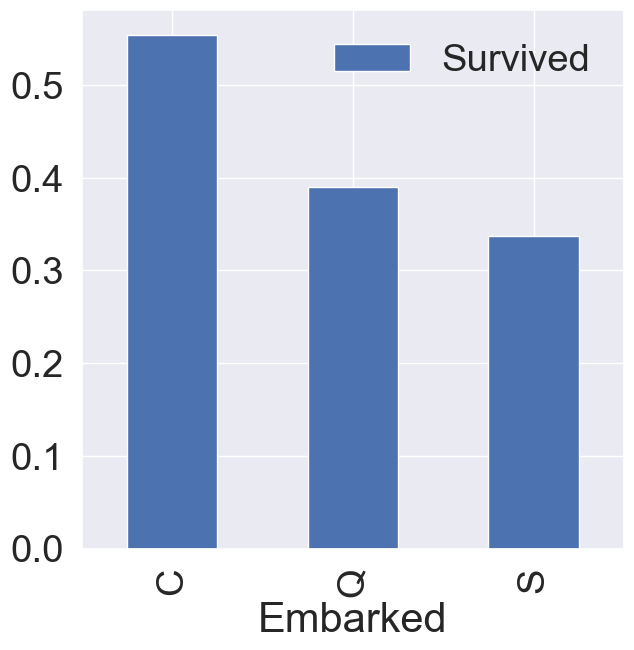

In [31]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)
#탑승한 항구에 따른 생존률 확인

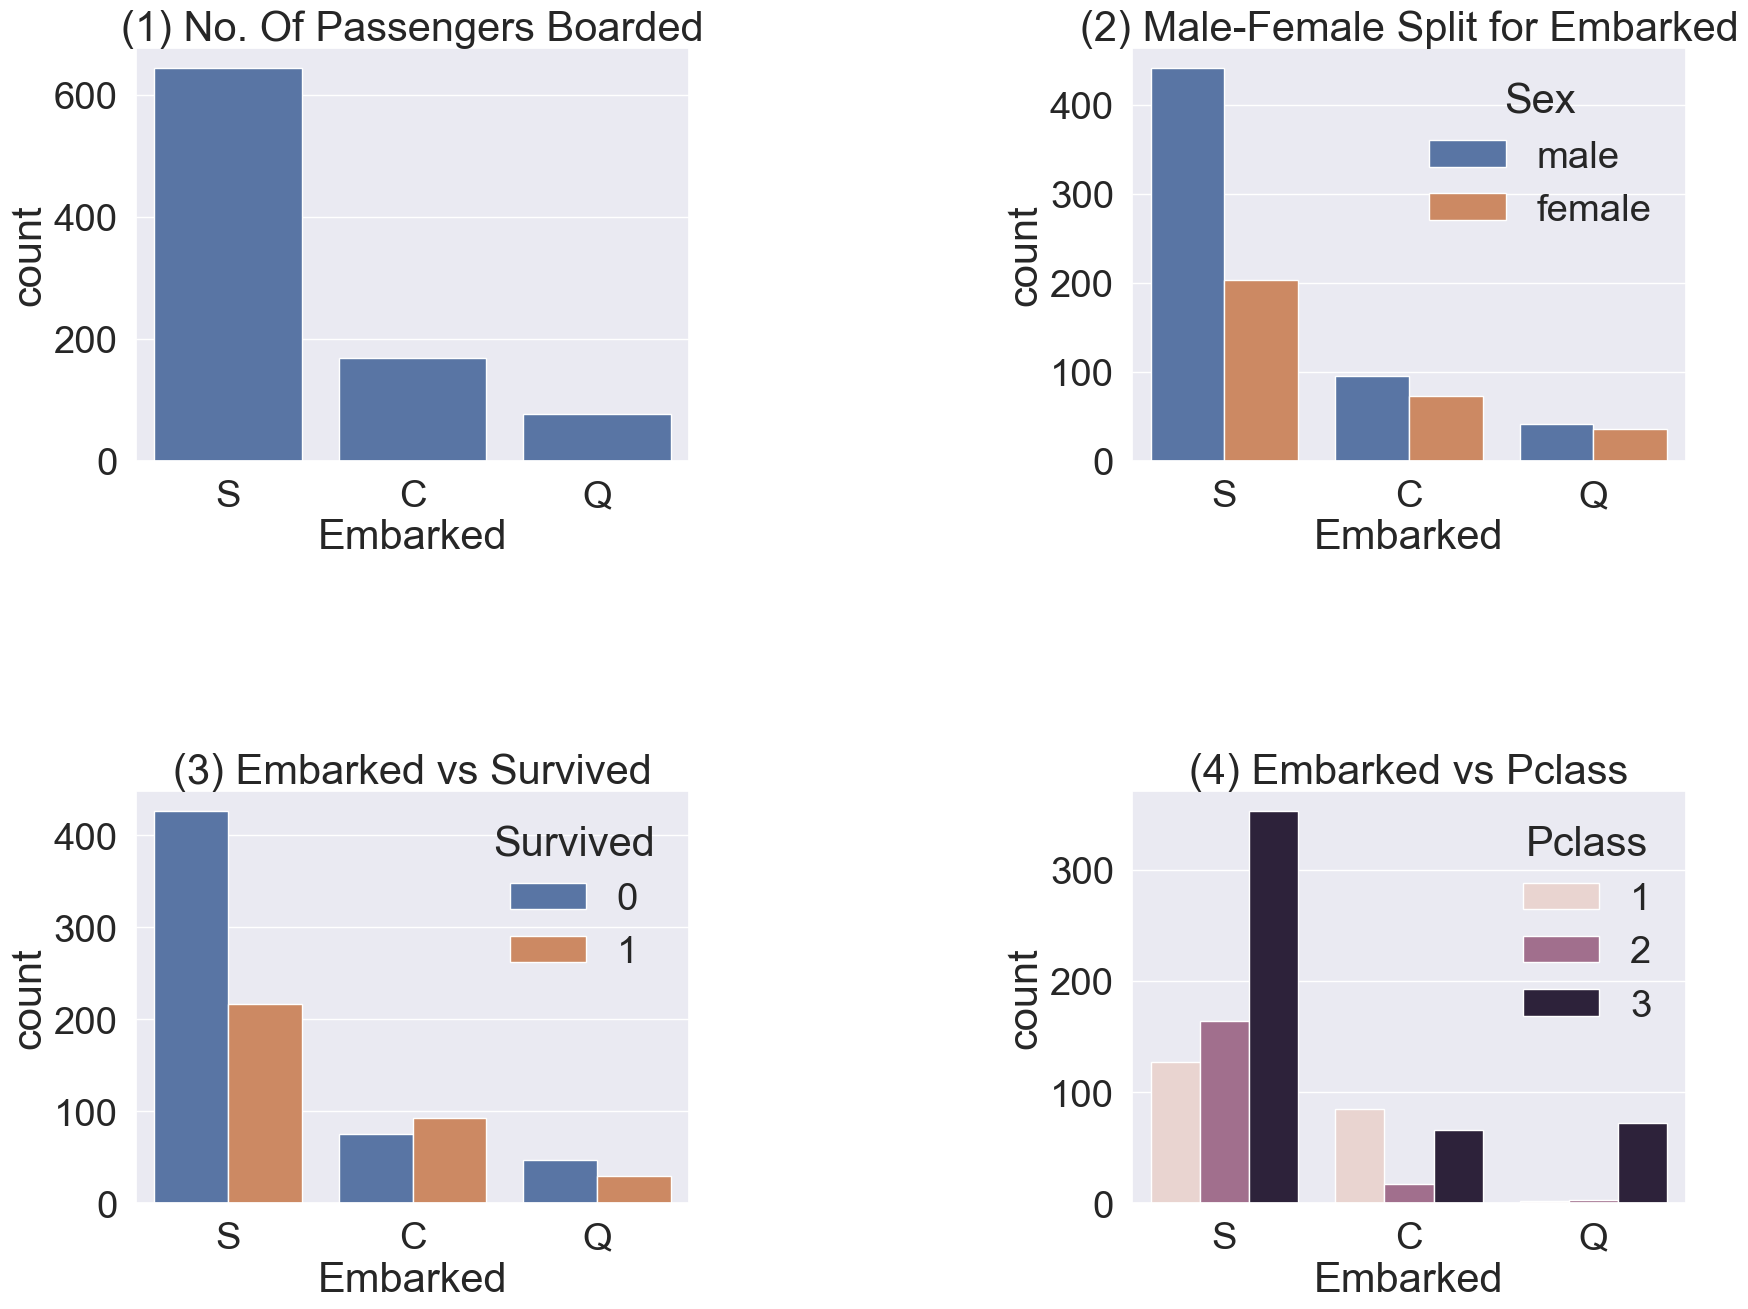

In [32]:
f, ax = plt.subplots(2, 2, figsize =(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded') #1번째 fig
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked') #2번째 fig
sns.countplot(x='Embarked', hue= 'Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived') #3번째 fig
sns.countplot(x='Embarked', hue= 'Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass') #4번째 fig


plt.subplots_adjust(wspace=0.8, hspace=0.8)
#서브플롯들 간격조정 / 가로방향 / 세로방향 얼마나 띄울지
plt.show()



In [33]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  #형제자매 + 부모자녀 + (1)자신
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1


In [34]:
print("Maximum size of Family: ", df_train['FamilySize'].max())  #가족단위 중 가장 많은 값
print("Mnimum size of Family: ", df_test['FamilySize'].min())    #가족단위 중 가장 적은 값

Maximum size of Family:  11
Mnimum size of Family:  1


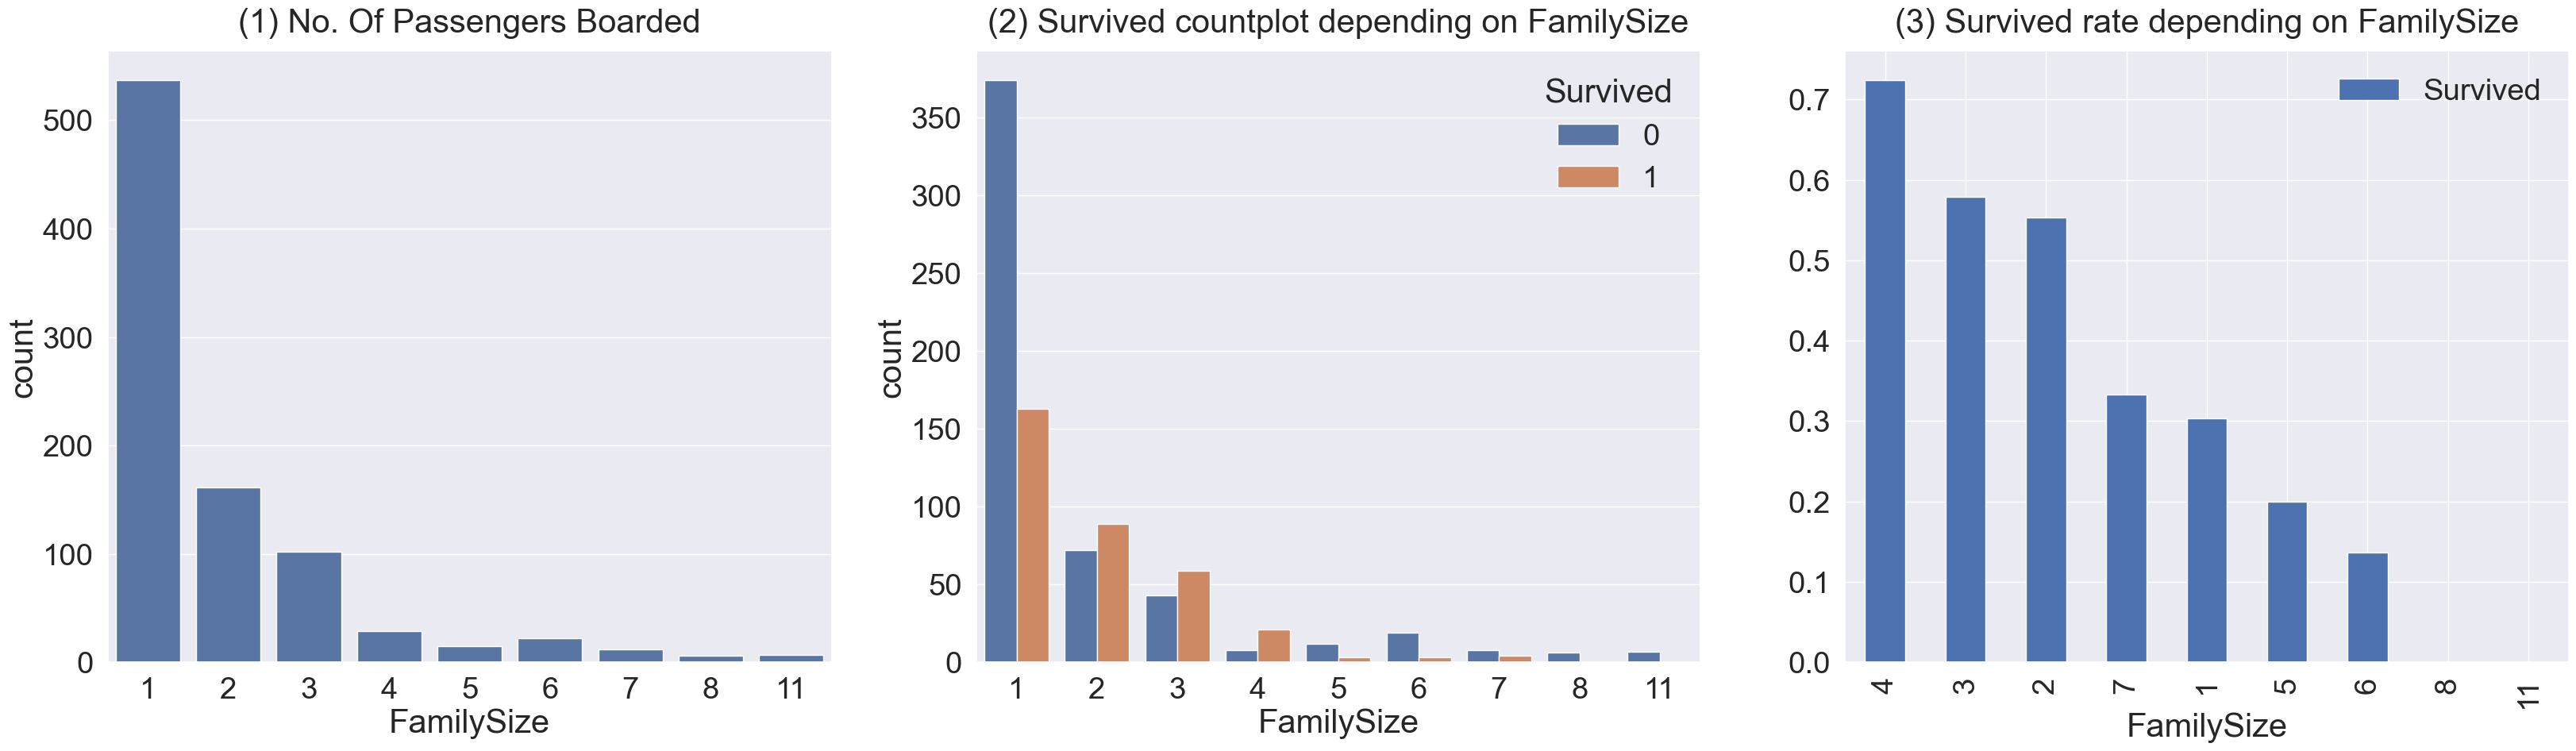

In [35]:
f, ax = plt.subplots(1, 3, figsize=(40,10))   #서브플롯 개수,사이즈 설정

sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02) #y 제목의 위치 설정

sns.countplot(x='FamilySize', hue= 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending = False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace = 0.2, hspace=0.6)
plt.show()



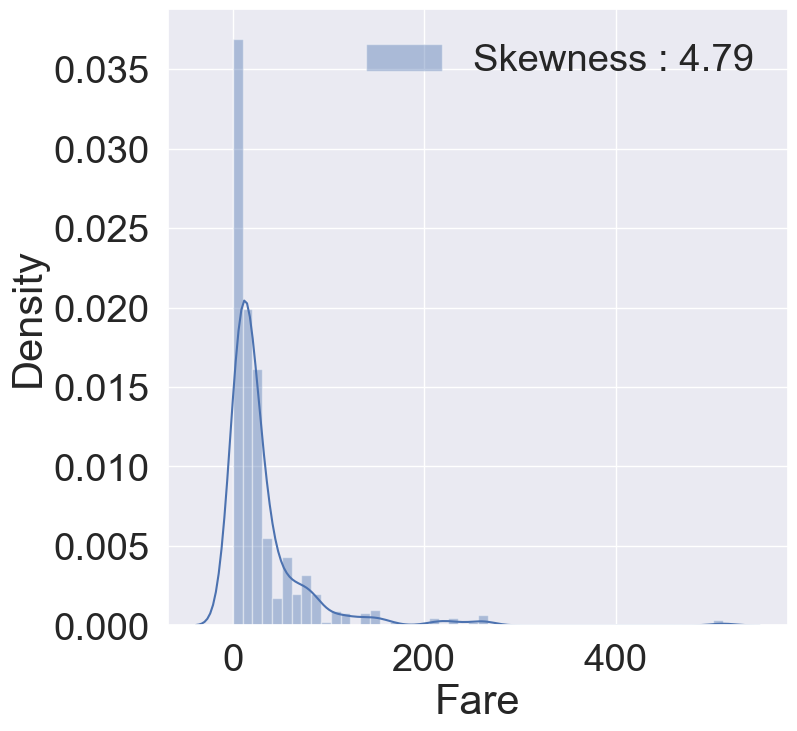

In [36]:
fig , ax = plt.subplots(1, 1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label = 'Skewness : {:.2f}'. format(df_train['Fare'].skew()), ax=ax)
                    #요금별 , 파란색, 왜도는 소수점 둘째자리까지 표시, 데이터의 왜도 계산(분포가 비대칭일수록 왜도 값이 커짐)

# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# 위 주석을 쓰면 y축값이 소수점 둘째자리까지 표시됨 but빈도 그래프이기에 예쁘진않음

g = g.legend(loc='best') #bes = 범례를 가장 적절한 위치에 자동 배치
#seaborn을 이용한 분포그래프(라벨로 왜도를 표시 - 왜도가 0에 가까우면 대칭, >0이면 우측꼬리, <0이면 좌측꼬리)

- 매우 비대칭이라 모델이 잘못 학습 할 위험이 큼 > outlier에 영향주기

In [37]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
                                    #각 원소에 함수 적용, i가 0보다 크면 log를 씌워라 아니면 0처리 / 왜도가 큰 데이터 분포를 정규화하는 전처리과정
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0) 

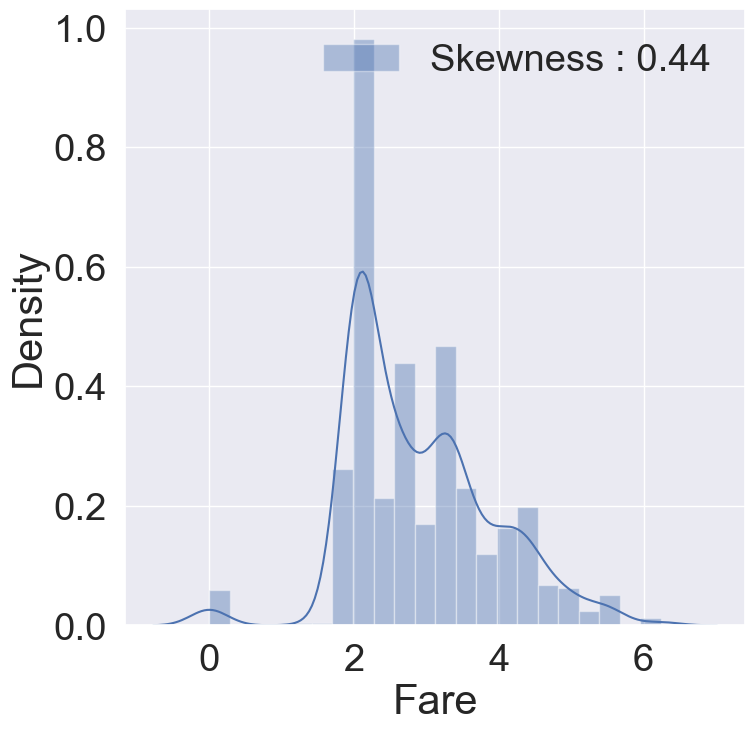

In [38]:
fig, ax = plt.subplots(1, 1, figsize =(8,8))
g = sns.distplot(df_train['Fare'], color = 'b' , label ='Skewness : {:.2f}'. format(df_train['Fare'].skew()), ax=ax)
g = g.legend( loc = 'best')

In [39]:
df_train.head()    #cabin엔 nan이 80%라 포함 ㄴㄴ

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


In [40]:
df_train['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

- Feature engineering

In [41]:
df_train ['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')  #데이터를 str으로 바꾼 후 정규표현식을 적용
df_test ['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')


In [42]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')
#이니셜 = 'A' 성='Female'인 경우 1명 등등 count.      셀의 숫자 크기에 따라 배경색 진하게 칠하기 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [43]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)


In [44]:
df_train.groupby('Initial').mean(numeric_only=True)  
#단순()만 썼을 때 그룹화는 잘되어있지만 오류발생 숫자형을 제대로 명시해줘야 실행됨

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

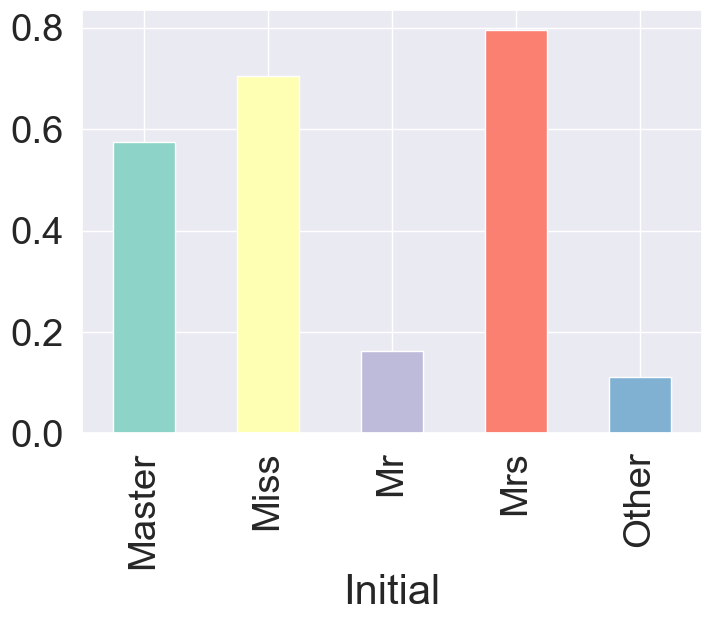

In [45]:
colors = sns.color_palette('Set3')   #색깔 지정

df_train.groupby('Initial')['Survived'].mean().plot.bar(color=colors)

In [46]:
df_train.groupby('Initial').mean(numeric_only=True) #null data 채우기 위해 다시 한 번 호출 / statistics 활용

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [47]:
# isnull()이면서 Mr인 조건을 만족하는 승객의 Age값을 33으로 치환하라. loc + boolean + column 자주 쓰임 
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

- Fill null in Embarked

In [48]:
print('Embarked has ', sum(df_train['Embarked']. isnull()), ' Null values')

Embarked has  2  Null values


In [49]:
df_train['Embarked'].fillna('S', inplace=True)    #Embarked에 null 2개 존재. null을 S로 채움

In [50]:
df_train['Age_cat'] = 0      #Age_cat이라는 열을 추가하고 모든 값에 0을 할당 그 이후 조건에 맞게 값 변경
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age']) & (df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age']) & (df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age']) & (df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age']) & (df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age']) & (df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age']) & (df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [51]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7
#위와 동일한 조건을 함수로 만듦
df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [52]:
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 -> ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야함 ->  True


In [53]:
df_train.drop(['Age','Age_cat_2'], axis=1, inplace =True)   #axis=0 행방향, =1 열방향
df_test.drop(['Age'], axis=1 , inplace =True)
#함수로 만든 칼럼과 중복되니 삭제

In [54]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
#map을 이용하여 문자형 변경

In [55]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [56]:
df_train['Embarked'].value_counts()   #Embarked도 문자형으로 이루어짐 

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [57]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [58]:
df_train['Embarked'].isnull().any()  #조건을 하나라도 만족하면 True를 반환

np.False_

In [59]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})   #Sex도 문자형
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

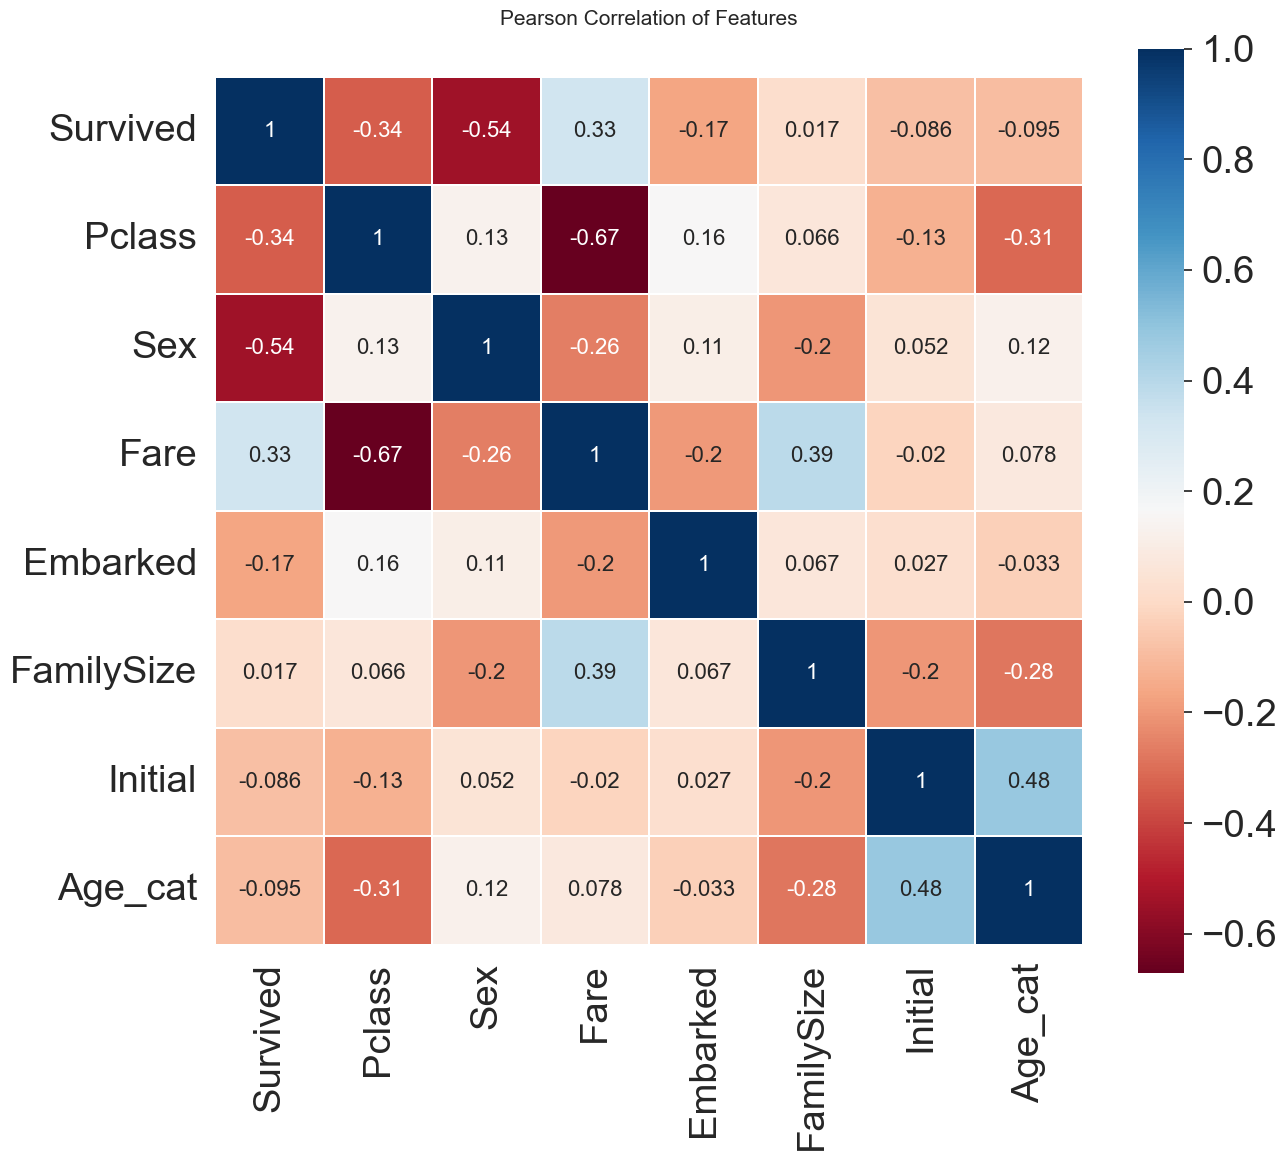

In [60]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 
#2D 배열을 색상으로 시각화 / 값이 큰 곳과 작은 곳을 다른 색으로 
colormap = plt.cm.RdBu   #히트맵에서 색상을 지정하는 방법 matplotlib의 컬러맵 중 하나인 RdBu사용
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data      #히트맵의 변수 삭제

In [61]:
#one-hot encoding / 직접 코딩도 가능하지만 get_dummies 사용하여 쉽게 해결
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
                             #이니셜 열을 더미변수로 변환, 새로운 열들의 이름에 이니셜이라는 접두어를 붙여라
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [62]:
#확인
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,False,False,True,False,False


In [63]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [64]:
#필요한 컬럼만 남기고 지우기

df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [65]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,False,False,True,False,False,False,False,True
1,1,1,0,4.266662,2,3,False,False,False,True,False,True,False,False
2,1,3,0,2.070022,1,2,False,True,False,False,False,False,False,True
3,1,1,0,3.972177,2,3,False,False,False,True,False,False,False,True
4,0,3,1,2.085672,1,3,False,False,True,False,False,False,False,True


In [66]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,False,False,True,False,False,False,True,False
1,3,0,1.945910,2,4,False,False,False,True,False,False,False,True
2,2,1,2.270836,1,6,False,True,False,False,False,False,True,False
3,3,1,2.159003,1,2,False,False,False,True,False,False,False,True
4,3,0,2.508582,3,2,False,False,True,False,False,False,False,True


- Sklear을 사용한 머신러닝 모델 만들기

In [70]:
#pip install scikit-learn       #아래 sklearn 설치 안 될 경우엔 scikit-learn 라이브러리 설치

In [71]:
# importing all the required ML packages

#Sklearn은 ML의 처음부터 끝까지 다 있으며 모든 작업들이 손쉬운 인터페이스로 구현디어 있기에 ML할 경우 라이브러리 반드시 숙지.
#현재 가지고 있는 train set의 input을 가지고 모델을 최적화시켜 샘플의 생존유무 판단하는 모델을 만들어냄
#그 후 학습하지 않은 train set을 input으로 주어 샘플의 생존 유무 예측해봄

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics     #모델의 평가를 위해서 아용 
from sklearn.model_selection import train_test_split  #training set를 쉽게 나눠주는 함수

In [72]:
X_train = df_train.drop('Survived', axis = 1).values
target_label = df_train['Survived'].values
X_test = df_test.values
#학습에 쓰일 데이터와 Survived를 drop을 사용하여 분리

In [81]:
#결정트리기반 모델 - 랜덤포레스트 사용 , 모델 객체를 만든 후 fit메소드로 학습한 후 valid set input을 넣어 예측값 얻음

#학습용,검증용 입력데이터 / 학습용,검증용 타겟값
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state = 2018)
                                        #입력 데이터, 타겟값, 전체 데이터 중 30%를 검증용으로 나머지는 학습용으로 사용, 데이터를 나누는 무작위 시드값

# "전체 데이터를 7:3비율로 랜덤하게 나눠서 X-tr,t_tr과 X_vld, y_vld로 나눈다" 

In [82]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [83]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존을 맞춤


- Feature importance

In [89]:
from pandas import Series

feature_importance = model.feature_importances_

Series_feat_imp =  Series(feature_importance, index = df_test.columns)
                #중요도 값들을 pd의 series형태로 바꿈. 중요도 값에 대응되는 컬럼 이름을 인덱스로 붙여라

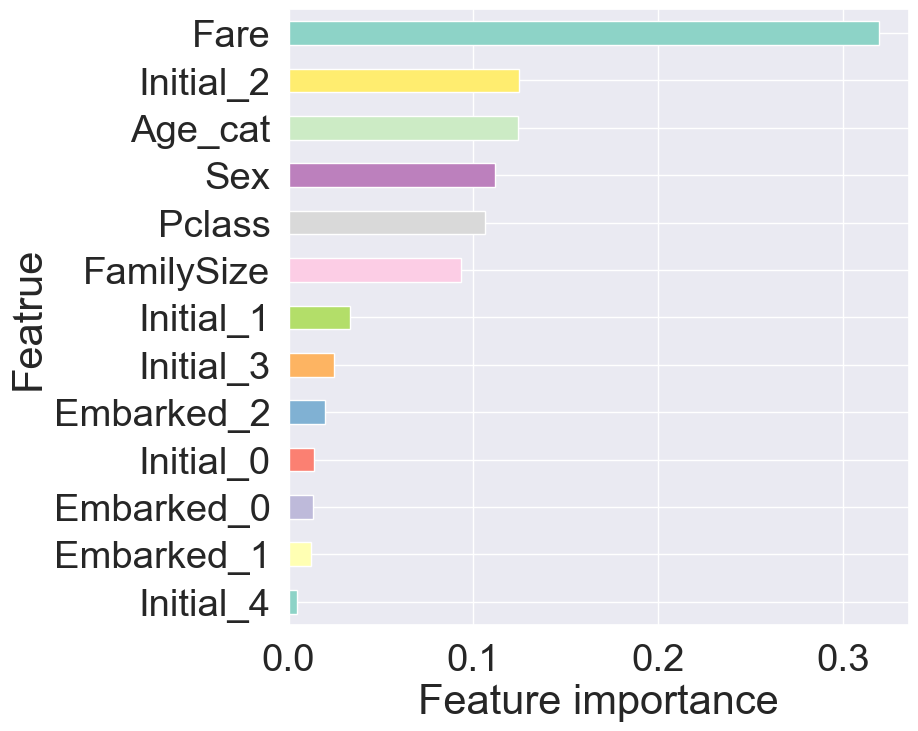

In [90]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending = True).plot.barh(color=colors)  #컬러 넣기
plt.xlabel('Feature importance')
plt.ylabel('Featrue')
plt.show()


- Prediction on Test set

In [93]:
submission = pd.read_csv('./tdata/gender_submission.csv')

In [94]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [95]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [97]:
submission.to_csv('./tdata/my_first_submission.csv', index=False)

#testset에 대해 예측 후 결과 csv 파일로 저장